# 自前で用意した画像の画像認識を行う

参考：https://aidemy.net/magazine/727/

### GoogleDriveのマウント

/content/drive/ 以下にマウントする

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### 独自のデータセットを読み込んで学習を行う

データセットは、GoogleDriceの `Colab Notebooks/99.ImageDetect/dataset` に配置していあるため、パスは `/content/drive/MyDrive/Colab Notebooks/99.ImageDetect/dataset` となっているので環境に応じて変更してください。

In [1]:
## tensorflow 版 keras を使う
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.python.keras.utils.vis_utils import plot_model
# from tensorflow.keras import backend as K
import random
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 分類クラス名とクラス数
classes = [
    "baseball",
    "castle",
    "fireworks",
    "Mahjongtiles",
    "rugby",
    "waterfall",
    "rabbit",
    "watch"
]
num_classes = len(classes)

batch_size = 32
epochs = 50
image_size = 32


############################################################    
# 準備
############################################################    
x_train, x_test, y_train, y_test = np.load('/content/drive/MyDrive/Colab Notebooks/99.ImageDetect/dataset/flickr_images_{0}.npy'.format(image_size), allow_pickle=True)

# データの正規化
x_train = x_train.astype("float") / 256
x_test = x_test.astype("float") / 256
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# 乱数の固定
random.seed(0)
tf.random.set_seed(0)


############################################################    
# 学習
############################################################    
# モデルの定義
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))                # 出力の数
model.add(Activation('softmax'))

# 最適化の定義
opt = keras.optimizers.RMSprop(learning_rate=0.0005, decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 学習(１回のトレーニング＝エポック)
fit = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[])

# サマリ表示
print(model.summary())

# モデルの保存
#model.save('./model_size{0}_batch{1}_epochs{2}.h5'.format(env_image_size, batch_size, epochs))

Epoch 1/50
35/35 [==============================] - 8s 189ms/step - loss: 2.0751 - accuracy: 0.1366 - val_loss: 2.0613 - val_accuracy: 0.2208
Epoch 2/50
35/35 [==============================] - 7s 188ms/step - loss: 2.0041 - accuracy: 0.2188 - val_loss: 1.8025 - val_accuracy: 0.4187
Epoch 3/50
35/35 [==============================] - 7s 188ms/step - loss: 1.7932 - accuracy: 0.3321 - val_loss: 1.6048 - val_accuracy: 0.4667
Epoch 4/50
35/35 [==============================] - 7s 187ms/step - loss: 1.6608 - accuracy: 0.3768 - val_loss: 1.5047 - val_accuracy: 0.4771
Epoch 5/50
35/35 [==============================] - 7s 188ms/step - loss: 1.5345 - accuracy: 0.4384 - val_loss: 1.3806 - val_accuracy: 0.5667
Epoch 6/50
35/35 [==============================] - 7s 187ms/step - loss: 1.3881 - accuracy: 0.5063 - val_loss: 1.3266 - val_accuracy: 0.5354
Epoch 7/50
35/35 [==============================] - 7s 186ms/step - loss: 1.3140 - accuracy: 0.5571 - val_loss: 1.2204 - val_accuracy: 0.5729
Epoch 

15/15 [==============================] - 1s 41ms/step - loss: 0.7854 - accuracy: 0.7854
Test Loss:  0.7853521704673767
Test Accuracy:  0.7854166626930237
[[51  2  0  3  5  3  3  2]
 [ 0 55  5  2  0  1  2  2]
 [ 1  1 61  0  0  0  1  1]
 [ 4  3  3 28  0  5  5  6]
 [ 1  1  0  1 44  0  1  0]
 [ 1  1  1  1  0 53  2  6]
 [ 1  0  0  0  1  4 50  0]
 [ 3  0  7  4  1  6  0 35]]
15/15 [==============================] - 1s 39ms/step


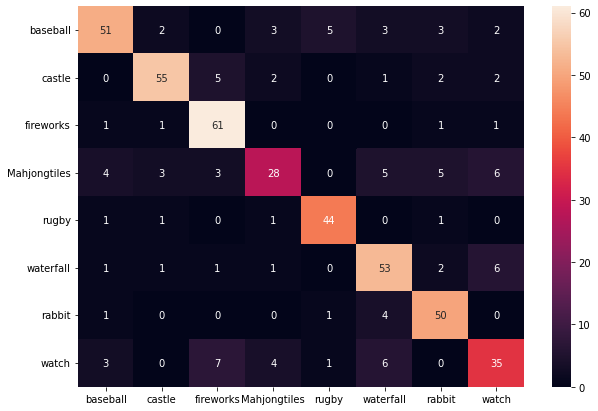

In [3]:
############################################################    
# 評価
############################################################    
scores = model.evaluate(x_test, y_test, verbose=1)

print('Test Loss: ', scores[0])
print('Test Accuracy: ', scores[1])

predict_x = model.predict(x_test, batch_size=32) 
predict_classes = np.argmax(predict_x, axis=1)
true_classes = np.argmax(y_test,1)
print(confusion_matrix(true_classes, predict_classes))

# 混同行列
y_pred = model.predict(x_test,batch_size=32,verbose=1)
y_true = np.argmax(y_test,1)
y_pred = np.argmax(y_pred,1)
cmx_data = confusion_matrix(y_true, y_pred)
df_cmx = pd.DataFrame(cmx_data, index=classes, columns=classes)
plt.figure(figsize = (10,7))
sns.heatmap(df_cmx, annot=True)
plt.show()

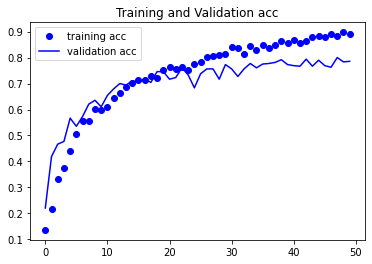

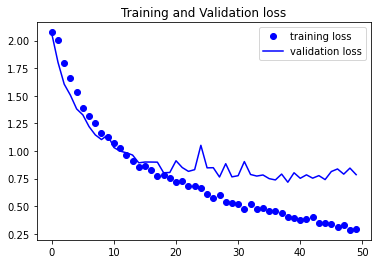

In [4]:
# Setting Parameters
acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']

epochs = range(len(acc))

# 1) Accracy Plt
plt.plot(epochs, acc, 'bo' ,label = 'training acc')
plt.plot(epochs, val_acc, 'b' , label= 'validation acc')
plt.title('Training and Validation acc')
plt.legend()

plt.figure()

# 2) Loss Plt
plt.plot(epochs, loss, 'bo' ,label = 'training loss')
plt.plot(epochs, val_loss, 'b' , label= 'validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()